In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"..\Data\Energy_merged.csv")
data.head()

,Unnamed: 0,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
0,0,AK,1990,4624985.0,974521.0,54.808483,55.817959,553290.0,71686,1.761320,8.359061,5599506.0,0.174037,0.825963,0.000000
1,1,AK,1991,4493715.0,896113.0,48.720062,53.505939,570193.0,71482,1.571596,7.881042,5389828.0,0.166260,0.833740,-0.007777
2,2,AK,1992,4380304.0,918120.0,52.377396,53.505939,588736.0,71791,1.559477,7.440184,5298424.0,0.173282,0.826718,0.007022
3,3,AK,1993,4418285.0,1302992.0,51.263107,50.661583,599432.0,71917,2.173711,7.370786,5721277.0,0.227745,0.772255,0.054463
4,4,AK,1994,4621109.0,1345407.0,39.825092,52.200809,603308.0,74443,2.230050,7.659618,5966516.0,0.225493,0.774507,-0.002252


## Full-set Visualizations

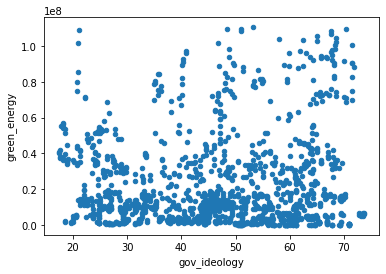

In [7]:
# All states, years, IDEOLOGY & GREEN ENERGY
data.plot.scatter(x='gov_ideology',y='green_energy')

## Limited-set Visualizaitons

In [8]:
california_df = pd.DataFrame(data)
data_pd = pd.DataFrame(data)

In [9]:
california_df = data.loc[data["state_id"] == "TX"]
california_df.head()

,Unnamed: 0,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
1150,1150,TX,1990,263417636.0,17653268.0,35.843048,43.146252,17056755.0,51492,1.034972,15.443596,281070904.0,0.062807,0.937193,0.000000
1151,1151,TX,1991,263598088.0,22024819.0,32.214745,62.208248,17398005.0,48813,1.265939,15.151053,285622907.0,0.077112,0.922888,0.014304
1152,1152,TX,1992,262832410.0,27134925.0,42.266624,62.208248,17759738.0,48007,1.527890,14.799341,289967335.0,0.093579,0.906421,0.016468
1153,1153,TX,1993,285094040.0,14193545.0,34.067841,61.821930,18161612.0,48123,0.781514,15.697618,299287585.0,0.047424,0.952576,-0.046155
1154,1154,TX,1994,276664061.0,30276203.0,29.574076,61.821930,18564062.0,50466,1.630904,14.903207,306940264.0,0.098639,0.901361,0.051214


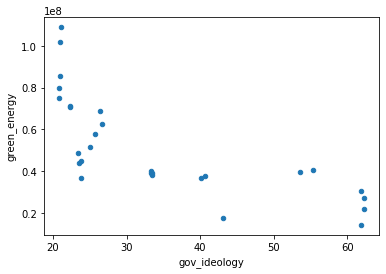

In [11]:
california_df.plot.scatter(x='gov_ideology',y='green_energy')

In [41]:
population_df = data.loc[data["population"] > 5000000]

In [42]:
population_df

,Unnamed: 0,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income
4,4,CA,1990,90666480.0,75118429.0,53.497696,49.020924,29959515.0,60726
7,7,FL,1990,108095287.0,21954164.0,41.883163,46.683979,13033307.0,48678
8,8,GA,1990,72958128.0,29728111.0,37.840973,58.592464,6512602.0,50275
12,12,IL,1990,57361243.0,72031228.0,51.473766,45.684338,11453316.0,59362
13,13,IN,1990,100976095.0,441021.0,43.918232,51.506969,5557798.0,49121
...,...,...,...,...,...,...,...,...,...
1362,1365,TN,2017,39066631.0,39958151.0,NaN,23.999550,6708799.0,55240
1363,1366,TX,2017,343372995.0,108893522.0,NaN,21.091362,28295273.0,59295
1365,1368,VA,2017,59498311.0,30705515.0,NaN,46.937275,8463587.0,71293
1367,1370,WA,2017,18616392.0,97239745.0,NaN,61.822315,7423362.0,75418


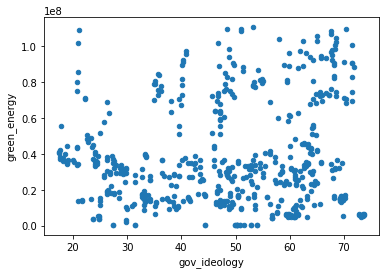

In [43]:
population_df.plot.scatter(x='gov_ideology',y='green_energy')

In [56]:
combined_states = data.loc[(data["state_id"] == "TX") | (data["state_id"] == "CA") | (data["state_id"] == "OH") | (data["state_id"] == "FL") |  (data["state_id"] == "PA")  ] 
combined_states

,Unnamed: 0,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
111,111,CA,1990,90666480.0,75118429.0,53.497696,49.020924,29959515.0,60726,2.507331,3.026300,165784909.0,0.453108,0.546892,0.000000
112,112,CA,1991,87173145.0,71769385.0,51.670151,49.668125,30470736.0,59253,2.355354,2.860881,158942530.0,0.451543,0.548457,-0.001565
113,113,CA,1992,103703251.0,73441997.0,52.472069,49.335564,30974659.0,59943,2.371035,3.348003,177145248.0,0.414586,0.585414,-0.036957
114,114,CA,1993,96229246.0,90749973.0,53.254501,49.596062,31274928.0,57078,2.901684,3.076881,186979219.0,0.485348,0.514652,0.070762
115,115,CA,1994,110944317.0,75233549.0,48.930843,47.864922,31484435.0,57975,2.389547,3.523783,186177866.0,0.404095,0.595905,-0.081253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1173,TX,2013,358276354.0,74831672.0,39.775494,20.853973,26480266.0,55891,2.825941,13.529938,433108026.0,0.172778,0.827222,0.006642
1174,1174,TX,2014,357287825.0,79960816.0,38.372040,20.853973,26964333.0,55839,2.965429,13.250386,437248641.0,0.182873,0.817127,0.010094
1175,1175,TX,2015,363546801.0,85545211.0,39.045319,20.962814,27470056.0,58432,3.114126,13.234294,449092012.0,0.190485,0.809515,0.007612
1176,1176,TX,2016,351600053.0,101683044.0,44.411690,20.962814,27914410.0,59396,3.642672,12.595647,453283097.0,0.224326,0.775674,0.033841


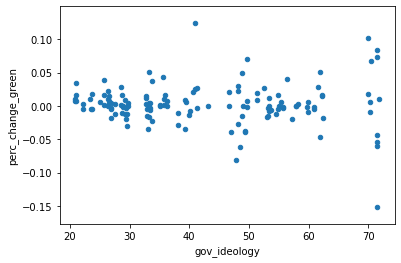

In [57]:
combined_states.plot.scatter(x='gov_ideology',y='perc_change_green')

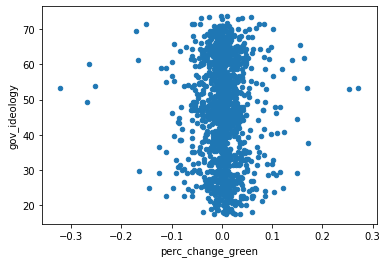

In [59]:
data.plot.scatter(x='perc_change_green',y='gov_ideology')

In [60]:
population_df_percent_change = data.loc[data["population"] > 5000000]

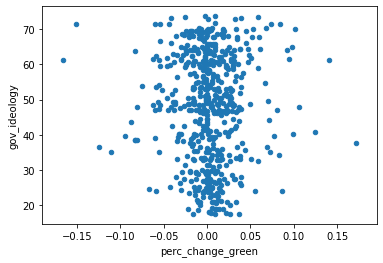

In [61]:
population_df_percent_change.plot.scatter(x='perc_change_green',y='gov_ideology')

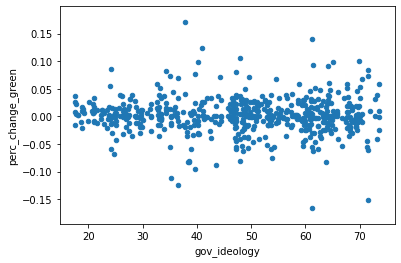

In [62]:
population_df_percent_change.plot.scatter(x='gov_ideology',y='perc_change_green')